# Projection of flattened patches and positional embedding for Vision Transformer (ViT)

#### Author: Antonio Rueda-Toicen
**antonio.rueda.toicen 'at' hpi 'dot' de**


[![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)](http://creativecommons.org/licenses/by/4.0/)

This work is licensed under a [Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).


In [54]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Load CIFAR-10 dataset
transform = transforms.ToTensor()  # Convert images to tensors
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=False)

# Get a batch of images
data_iter = iter(trainloader)
images, labels = next(data_iter)

# Now 'images' contains a batch of 64 CIFAR-10 images
# with shape (64, 3, 32, 32)
images.shape

torch.Size([64, 3, 32, 32])

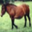

In [55]:
# Convert the tensor to numpy array
image_np = images[7].permute(1, 2, 0).numpy()

# Convert the data type to uint8 and scale to 0-255
image_np = (image_np * 255).astype(np.uint8)

# Create the PIL Image to see it on its 'real' resolution
image = Image.fromarray(image_np)
image

In [56]:
# Hyperparameters
patch_size = 16
channels   = 3
embed_dim  = 768  # Standard ViT-Base embedding dimension

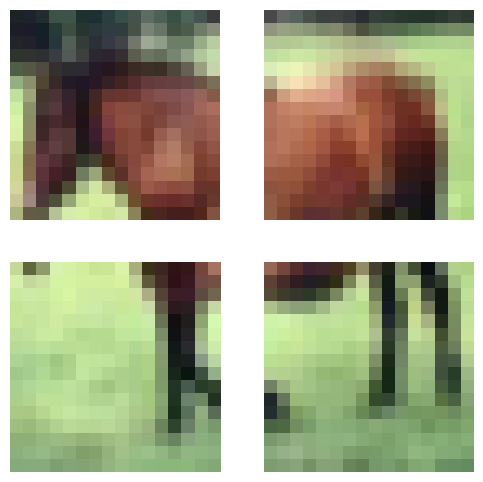

In [57]:
# Visualizing patches
patches = [
    image_np[:patch_size, :patch_size],  # Top-left
    image_np[:patch_size, patch_size:],  # Top-right
    image_np[patch_size:, :patch_size],  # Bottom-left
    image_np[patch_size:, patch_size:],  # Bottom-right
]

# Plot the patches
fig, axes = plt.subplots(2, 2, figsize=(6, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(patches[i])
    ax.axis('off')

plt.show()

In [58]:
# Calculate number of patches
num_patches = (32 // patch_size) * (32 // patch_size)  # 4 = 2*2
patch_dim = patch_size * patch_size * channels  # 768 = 16*16*3

# Linear projection and positional embedding
patch_embed = nn.Linear(patch_dim, embed_dim)
pos_embed = nn.Parameter(torch.zeros(1, num_patches, embed_dim))


In [59]:
# Reshape data into patches
# From (batch_size, channels, height, width) to (batch_size, channels, h_patches, patch_size, w_patches, patch_size)
patches = images.unfold(2, patch_size, patch_size).unfold(3, patch_size, patch_size)

# Reshape to (batch_size, num_patches, patch_dim)
patches = patches.permute(0, 2, 4, 1, 3, 5).reshape(images.size(0), num_patches, -1)

# Linear projection of patches
x = patch_embed(patches)  # Shape: (batch_size, num_patches, embed_dim)

# Add positional embeddings
x = x + pos_embed

print(f"Input shape: {images.shape}")  # [4, 3, 32, 32]
print(f"Patches shape: {patches.shape}")  # [4, 4, 768]
print(f"Output shape: {x.shape}")  # [4, 4, 768]


Input shape: torch.Size([64, 3, 32, 32])
Patches shape: torch.Size([64, 4, 768])
Output shape: torch.Size([64, 4, 768])
